In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',80)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
stopwords_eng = stopwords.words('english')

# Import data

In [4]:
tweets_df = pd.read_csv('Data/tweets_election2.csv')

In [5]:
tweets_df = tweets_df.dropna()
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [6]:
tweets_df.drop_duplicates('tweet', keep='first', inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [7]:
len(tweets_df)

84547

In [8]:
tweets_df.head()

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,...,continent,state,state_code,subject,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string
0,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years, for ten years, I heard China!...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,...,North America,Oregon,OR,Donald Trump,as a student i used to hear for years for ten years i heard china in ...,"['student', 'used', 'hear', 'years', 'ten', 'years', 'heard', 'china', 'know...","['student', 'use', 'hear', 'years', 'ten', 'years', 'hear', 'china', 'know',...","['student', 'use', 'hear', 'year', 'ten', 'year', 'hear', 'china', 'know', '...",student use hear years ten years hear china know many ask many say sir know ...,student use hear year ten year hear china know mani ask mani say sir know mi...
1,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a U...",0.0,0.0,Twitter for iPhone,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,...,North America,Illinois,IL,Donald Trump,in is being by twitter to manipulate a us election in favor of and...,"['twitter', 'manipulate', 'us', 'election', 'favor', 'ccp', 'porn', 'twitter...","['twitter', 'manipulate', 'us', 'election', 'favor', 'ccp', 'porn', 'twitter...","['twitter', 'manipul', 'us', 'elect', 'favor', 'ccp', 'porn', 'twitter', 'al...",twitter manipulate us election favor ccp porn twitter always fine sick,twitter manipul us elect favor ccp porn twitter alway fine sick
2,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but some of the farmers were doing be...",1.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,...,North America,Oregon,OR,Donald Trump,nobody likes to tell you this but some of the farmers were doing better t...,"['nobody', 'likes', 'tell', 'farmers', 'better', 'way', 'working', 'asses', ...","['nobody', 'like', 'tell', 'farmers', 'better', 'way', 'work', 'asses', 'che...","['nobodi', 'like', 'tell', 'farmer', 'better', 'way', 'work', 'ass', 'check'...",nobody like tell farmers better way work asses check totally mail right,nobodi like tell farmer better way work ass check total mail right
3,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how Ruthless China is?"" https://t...",0.0,0.0,Twitter Web App,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,...,North America,Florida,FL,Donald Trump,comments on this do democrats understand how ruthless china is,"['comments', 'democrats', 'understand', 'ruthless', 'china']","['comment', 'democrats', 'understand', 'ruthless', 'china']","['comment', 'democrat', 'understand', 'ruthless', 'china']",comment democrats understand ruthless china,comment democrat understand ruthless china
4,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrump by the balls &amp; chuck the...,2.0,0.0,Twitter for iPhone,1952.0,"Western Washington, USA",41.882823,-87.686307,Chicago,...,North America,Illinois,IL,Donald Trump,grab by the balls amp chuck the bastard out the door onto amp form a...,"['grab', 'balls', 'amp', 'chuck', 'bastard', 'door', 'onto', 'amp', 'form', ...","['grab', 'ball', 'amp', 'chuck', 'bastard', 'door', 'onto', 'amp', 'form', '...","['grab', 'ball', 'amp', 'chuck', 'bastard', 'door', 'onto', 'amp', 'form', '...",grab ball amp chuck bastard door onto amp form line amp everybody get kick n...,grab ball amp chuck bastard door onto amp form line amp everybodi get kick n...


In [9]:
tfidf_vector = TfidfVectorizer(max_df=0.3, min_df=10, stop_words=stopwords_eng, ngram_range=(1,2), max_features=1000)

X  = tfidf_vector.fit_transform(tweets_df['lemmatized_string'])

In [12]:
ssd = []

for k in range(1,20):
    
    model = KMeans(n_clusters=k, random_state=42)
    
    
    model.fit(X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method to find the optimal k value')

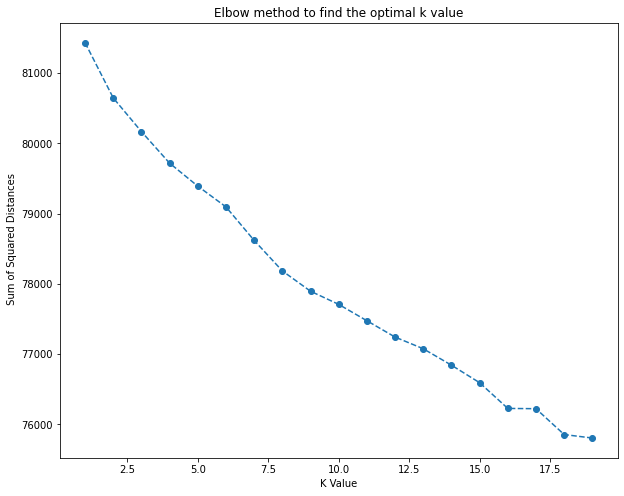

In [13]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow method to find the optimal k value")

In [14]:
num_clusters = 14

km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
labels = km.fit_predict(X)

In [15]:
print("Top 10 words per cluster")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print(f"Cluster #{i}")
    top_ten_words = [tfidf_vector.get_feature_names()[ind] for ind in order_centroids[i, :10]]
    print(top_ten_words)
    print('\n')

Top 10 words per cluster
Cluster #0
['trump', 'president', 'know', 'one', 'win', 'election', 'us', 'campaign', 'take', 'time']


Cluster #1
['get', 'go', 'let', 'trump', 'vote', 'back', 'know', 'win', 'need', 'say']


Cluster #2
['like', 'look', 'look like', 'trump', 'click', 'sound', 'sound like', 'would', 'say', 'vote']


Cluster #3
['say', 'trump', 'anti trump', 'anti', 'trump please', 'please vote', 'please', 'vote', 'know', 'trump say']


Cluster #4
['via', 'trump', 'biden', 'new', 'twitter', 'epic', 'three', 'independent', 'rise', 'new york']


Cluster #5
['biden', 'joe', 'joe biden', 'hunter', 'trump', 'hunter biden', 'harris', 'president', 'biden harris', 'campaign']


Cluster #6
['vote', 'vote vote', 'trump', 'vote trump', 'early', 'already', 'get', 'want', 'already vote', 'today']


Cluster #7
['amp', 'trump', 'vote', 'go', 'say', 'us', 'know', 'get', 'support', 'let']


Cluster #8
['people', 'american people', 'trump', 'vote', 'american', 'say', 'know', 'get', 'want', 'like'

In [16]:
tweets_df['cluster'] = labels

Text(0.5, 0.98, 'Size of each cluster')

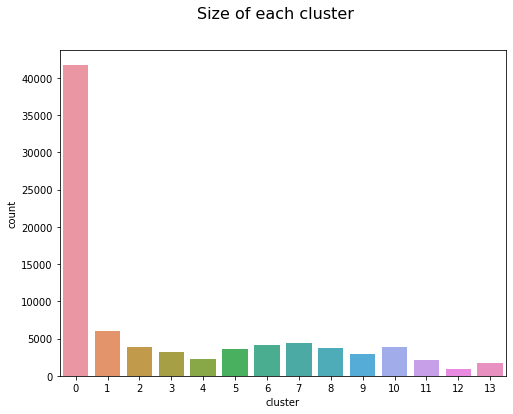

In [17]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='cluster', data=tweets_df)
fig.suptitle('Size of each cluster', fontsize=16)

In [18]:
for c in range(num_clusters):
    print(f"Cluster {c}")
    print(tweets_df[tweets_df['cluster'] == c].tweet)
    print('\n')

Cluster 0
1        In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a U...
3        Comments on this? "Do Democrats Understand how Ruthless China is?" https://t...
5        Who does #trump owe 420 million dollars to? What are the terms? Who is #Dona...
7                       I have lost track of what #Trump is talking about. So has Trump.
13                                                  @JoeBiden #donaldtrump 4 more years!
                                              ...                                       
84516    OMG did I just start crying over this... I did. Thank you @Eminem this is be...
84521    If #bunkerbitch @realDonaldTrump doesn't leave the #WhiteHouse, NYC will tak...
84522    It's time for my Presidential Election Prediction!  Pray that this will be t...
84541    Lady gaga live!\n#JoeBiden\n#LadyGaga\n#VoteBidenHarrisToSaveAmerica\n\nhttp...
84543    Literally luv 🙄 #Election2020 #JoeBiden #Biden2020 #KamalaHarris #chileplz #...
Name: tweet

224      @Psychosevoorbij @NUnl Hoezo stumper? Het is geen stuiptrekking van #Trump z...
267      @Psychosevoorbij @NUnl Dat u deze woorden gebruikt en vooral geen feitelijke...
306      #US 🇺🇸 👉 Se confirma el aumento de la Confianza del Consumidor bajo la admin...
407      #Trump y #Biden ajustaron sus campañas para motivar a los votantes que bien ...
441      A 21 días de las elecciones, Trump y Biden libran duelo en estados clave - h...
                                              ...                                       
84177    #eleccionesEEUU No se pierdan al actor Eugenio Derbez y al equipo de Llamand...
84227    Último episodio de Postales de campaña es un estado que se ha convertido en ...
84277    Here’s my son’s message to everyone / Aquí el mensaje de mi hijo para todos!...
84483    La gran differencia.\n\n#PresidentTrump: "Nuestros dias mejores estan adelan...
84523    Biden dio certeza a los venezolanos sobre conseguir la libertad del país si ...
Name: tweet, Length: 

## Seperate tweets for Trump related tweets

In [9]:
keywords = ["trump", "donald", "donald trump", "republicans"]

In [10]:
tweets_trump = pd.DataFrame()

In [11]:
for k in keywords:
    temp = tweets_df[tweets_df['cleaned_text'].str.lower().str.contains(k)]
    tweets_trump = tweets_trump.append(temp)

tweets_trump.reset_index(drop=True, inplace=True)

In [12]:
tweets_trump.shape[0]

16144

In [13]:
tfidf_vector = TfidfVectorizer(max_df=0.3, min_df=10, stop_words=stopwords_eng, ngram_range=(1,2), max_features=1000)

X_trump  = tfidf_vector.fit_transform(tweets_trump['lemmatized_string'])

In [14]:
ssd = []

for k in range(1,15):
    
    model = KMeans(n_clusters=k, random_state=42)
    
    
    model.fit(X_trump)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method to find the optimal k value')

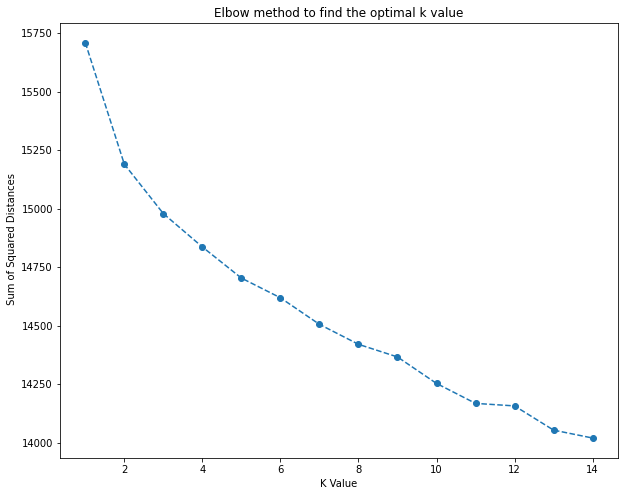

In [15]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,15),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow method to find the optimal k value")

In [16]:
trump_num_clusters = 12

km = KMeans(n_clusters=trump_num_clusters, init='k-means++', random_state=42)
labels = km.fit_predict(X_trump)

In [17]:
print("Top 10 words per cluster")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(trump_num_clusters):
    print(f"Cluster #{i}")
    top_ten_words = [tfidf_vector.get_feature_names()[ind] for ind in order_centroids[i, :10]]
    print(top_ten_words)
    print('\n')

Top 10 words per cluster
Cluster #0
['amp', 'say', 'get', 'like', 'go', 'people', 'via', 'republicans', 'know', 'lie']


Cluster #1
['york independent', 'via follow', 'trump agonistes', 'three act', 'rise fall', 'follow new', 'american epic', 'agonistes american', 'agonistes', 'fall via']


Cluster #2
['vote', 'vote trump', 'republicans', 'trump vote', 'vote biden', 'make', 'vote vote', 'people', 'get', 'biden']


Cluster #3
['biden', 'joe', 'joe biden', 'donald', 'donald trump', 'debate', 'trump biden', 'biden trump', 'via', 'shirt']


Cluster #4
['hollis', 'medications', 'treatment best', 'multiple fold', 'medications help', 'law pay', 'pay multiple', 'father law', 'hollis father', 'help hollis']


Cluster #5
['win', 'trump win', 'election', 'win election', 'biden', 'vote', 'go', 'say', 'lose', 'republicans']


Cluster #6
['donald', 'donald trump', 'president', 'president donald', 'via', 'click', 'say', 'america', 'great', 'take']


Cluster #7
['wi', 'count', 'mi', 'amp', 'pa', 'able

In [18]:
tweets_trump['cluster'] = labels

Text(0.5, 0.98, 'Size of each cluster')

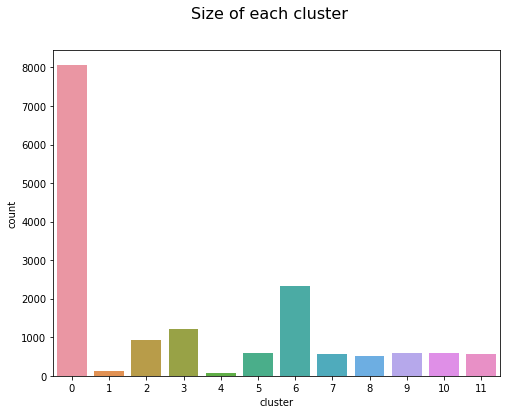

In [19]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='cluster', data=tweets_trump)
fig.suptitle('Size of each cluster', fontsize=16)

In [20]:
for c in range(trump_num_clusters):
    print(f"Cluster {c}")
    print(tweets_trump[tweets_trump['cluster'] == c].tweet)
    print('\n')

Cluster 0
0                       I have lost track of what #Trump is talking about. So has Trump.
1        @glennkirschner2 So basically the American experiment has failed ; we have n...
2        #Relapse or did #Trump just run out of drugs?  either way -- back to the bas...
3        #Trump: I don't mind running against sleepy Joe but I wouldn't want to run a...
4        The Evilness of human beings should be measured in TRUMPS.\n.\n.\n\n#DonaldT...
                                              ...                                       
16137    Republicans &amp; Democrats have bitched on social media for 1,456 days. Whe...
16139    Perspective | Harassing the #Biden bus could backfire on Republicans - The W...
16141    @realDonaldTrump The murderer has no moral authority to console his victims....
16142    Why isn't @JoeBiden called out for pulling his mask down numerous times next...
16143    Here is a list of Republicans endorsing #Biden.\n\nThere is no similar outpo...
Name: tweet

## Seperate tweets for Biden related tweets

In [21]:
keywords = ["joe", "biden", "joe biden", "democrats", "democratics"]

In [22]:
tweets_biden = pd.DataFrame()

In [23]:
for k in keywords:
    temp = tweets_df[tweets_df['cleaned_text'].str.lower().str.contains(k)]
    tweets_biden = tweets_biden.append(temp)
    
tweets_biden.reset_index(drop=True, inplace=True)

In [24]:
tweets_biden.shape[0]

13359

In [25]:
tfidf_vector = TfidfVectorizer(max_df=0.3, min_df=10, stop_words=stopwords_eng, ngram_range=(1,2), max_features=1000)

X_biden  = tfidf_vector.fit_transform(tweets_biden['lemmatized_string'])

In [26]:
ssd = []

for k in range(1,15):
    
    model = KMeans(n_clusters=k, random_state=42)
    
    
    model.fit(X_biden)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method to find the optimal k value')

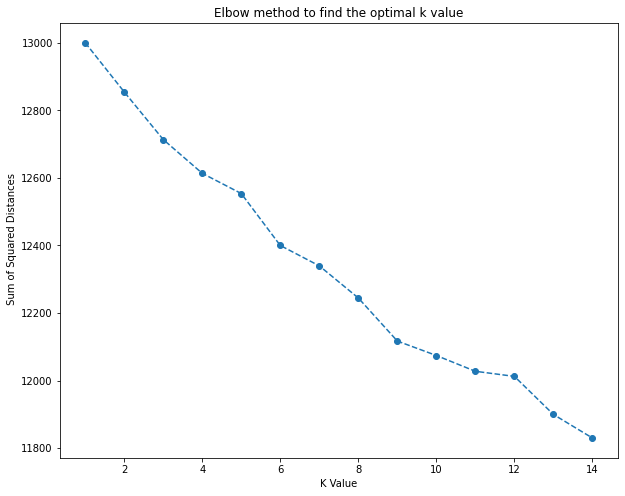

In [27]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,15),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow method to find the optimal k value")

In [28]:
biden_num_clusters = 9

km = KMeans(n_clusters=biden_num_clusters, init='k-means++', random_state=42)
labels = km.fit_predict(X_biden)

In [29]:
print("Top 10 words per cluster")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(biden_num_clusters):
    print(f"Cluster #{i}")
    top_ten_words = [tfidf_vector.get_feature_names()[ind] for ind in order_centroids[i, :10]]
    print(top_ten_words)
    print('\n')

Top 10 words per cluster
Cluster #0
['amp', 'go', 'via', 'get', 'president', 'democrats', 'win', 'campaign', 'know', 'like']


Cluster #1
['vote', 'vote joe', 'vote biden', 'reason vote', 'reason', 'trump', 'biden vote', 'want', 'vote trump', 'vote vote']


Cluster #2
['hunter', 'hunter biden', 'email', 'business', 'laptop', 'deal', 'via', 'post', 'partner', 'family']


Cluster #3
['sick parkinson', 'parkinson disease', 'biden sick', 'parkinson', 'disease', 'sick', 'watch share', 'share joe', 'please watch', 'share']


Cluster #4
['say', 'biden say', 'trump', 'say joe', 'say biden', 'amp', 'people', 'would', 'like', 'get']


Cluster #5
['click', 'click joes', 'joes picture', 'joes', 'page', 'picture', 'retweet', 'memes click', 'picture take', 'page find']


Cluster #6
['wolfman', 'wolfman joe', 'show day', 'joe show', 'watch wolfman', 'day', 'show', 'watch', 'facts', 'angry']


Cluster #7
['trump', 'donald trump', 'donald', 'president', 'debate', 'trump biden', 'biden trump', 'presiden

In [30]:
tweets_biden['cluster'] = labels

Text(0.5, 0.98, 'Size of each cluster')

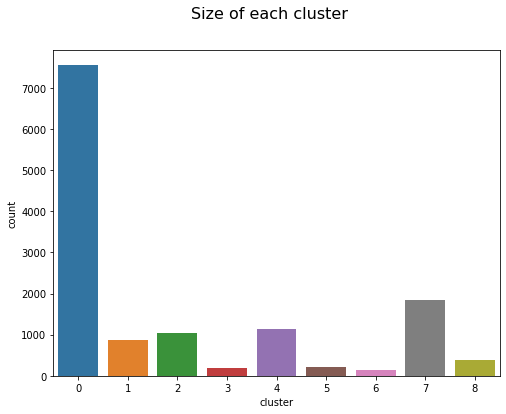

In [31]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='cluster', data=tweets_biden)
fig.suptitle('Size of each cluster', fontsize=16)

In [39]:
for c in range(biden_num_clusters):
    print(f"Cluster {c}")
    print(tweets_biden[tweets_biden['cluster'] == c].tweet)
    print('\n')

Cluster 0
0        The President @realDonaldTrump got impeached for something Joe Biden did.\n#...
1        #Trump: I don't mind running against sleepy Joe but I wouldn't want to run a...
2        Election is 20 days away, what better way to deface a Biden sign then the Jo...
4        #TRUMP2020 #DonaldTrump #JoeBiden looks like Joe and Hunter stepped on each ...
7        @DonaldJTrumpJr @LydiaLynn89 Obama knew what a liability Joe Biden and his f...
                                              ...                                       
13351    Joe Biden and Democrats in Congress are pushing policies that would do dispr...
13353    Democrats are masking Biden's frailty: Devine https://t.co/p8VFy6enG9 #Democ...
13355    @maggieNYT Democrats with superiority complexes should think twice before ar...
13357    #JoeBiden is too weak and too incompetent to not be controlled by the far le...
13358    A lot of the fault can be laid right on the doorstep of @CNN @wolfblitzer an...
Name: tweet

## Sentiment Analysis

In [32]:
from nrclex import NRCLex

In [33]:
# tweets_df['emotion'] = ''
tweets_trump['emotion'] = ''
tweets_biden['emotion'] = ''

In [34]:
"""
for i in range(0,len(tweets_df)):
    tweet = tweets_df['lemmatized_string'][i]
    nrc_tweet = NRCLex(tweet)
    tweets_df['emotion'][i] = nrc_tweet.top_emotions[0][0]
"""

"\nfor i in range(0,len(tweets_df)):\n    tweet = tweets_df['lemmatized_string'][i]\n    nrc_tweet = NRCLex(tweet)\n    tweets_df['emotion'][i] = nrc_tweet.top_emotions[0][0]\n"

In [35]:
for i in range(0,len(tweets_trump)):
    tweet = tweets_trump['lemmatized_string'][i]
    nrc_tweet = NRCLex(tweet)
    tweets_trump['emotion'][i] = nrc_tweet.top_emotions[0][0]

<ipython-input-35-c9119b4427fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['emotion'][i] = nrc_tweet.top_emotions[0][0]


In [36]:
for i in range(0,len(tweets_biden)):
    tweet = tweets_biden['lemmatized_string'][i]
    nrc_tweet = NRCLex(tweet)
    tweets_biden['emotion'][i] = nrc_tweet.top_emotions[0][0]

<ipython-input-36-e40f3502917f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['emotion'][i] = nrc_tweet.top_emotions[0][0]


## Trump sentiment analysis per cluster

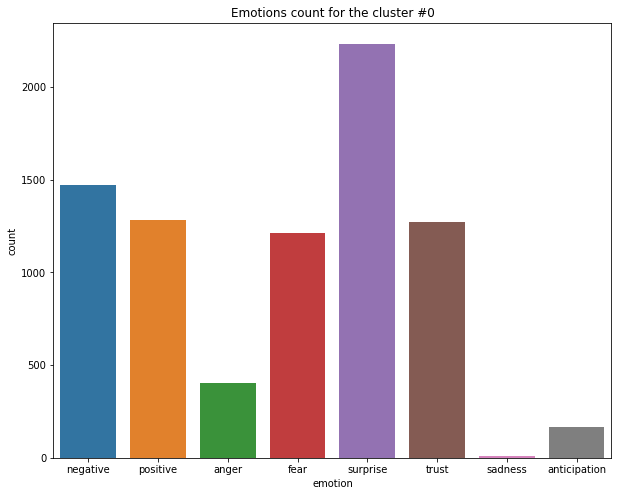

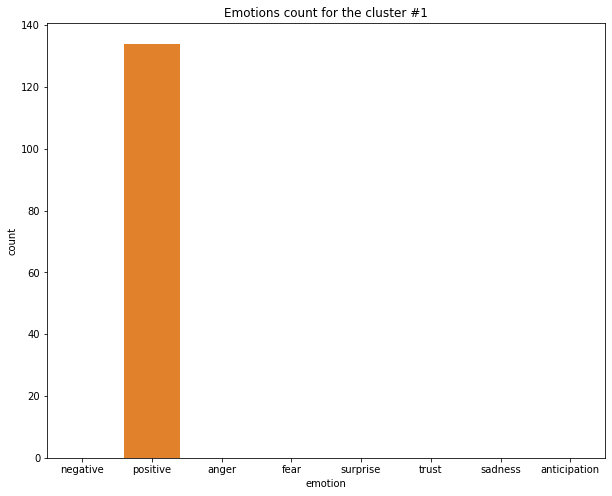

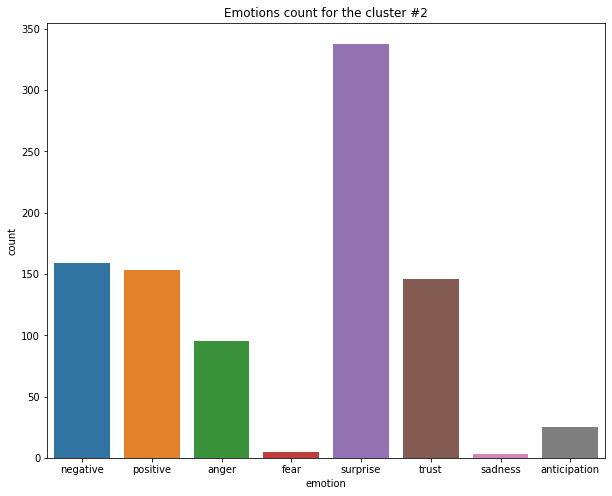

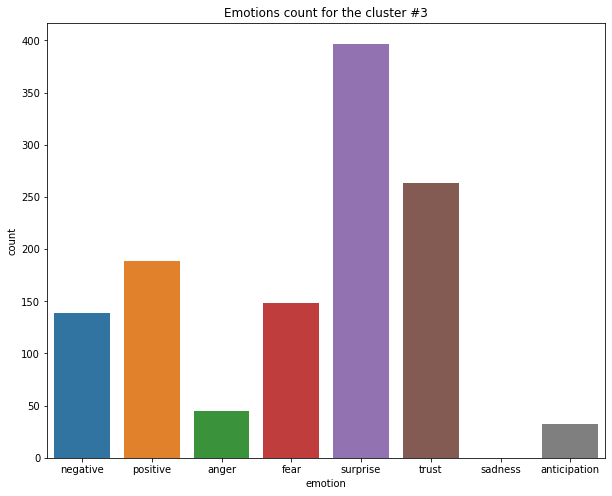

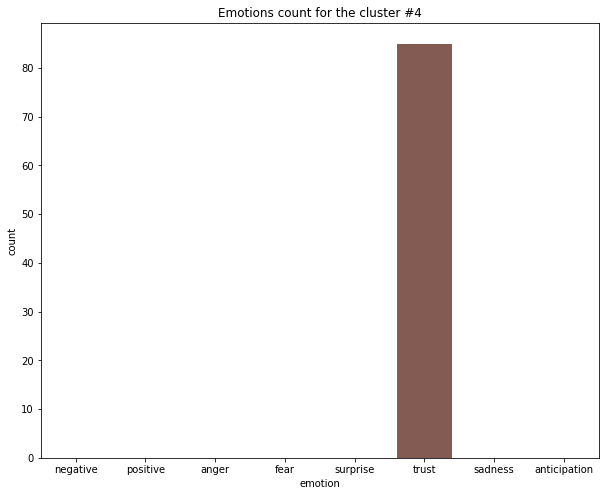

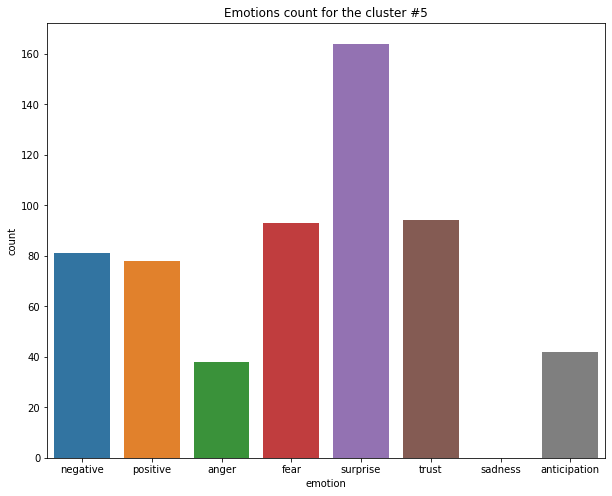

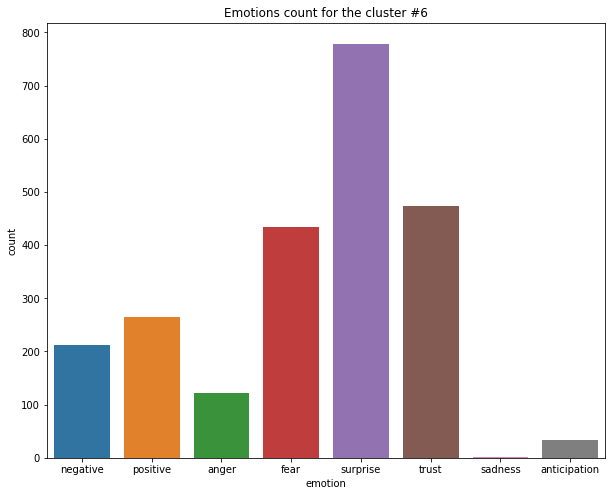

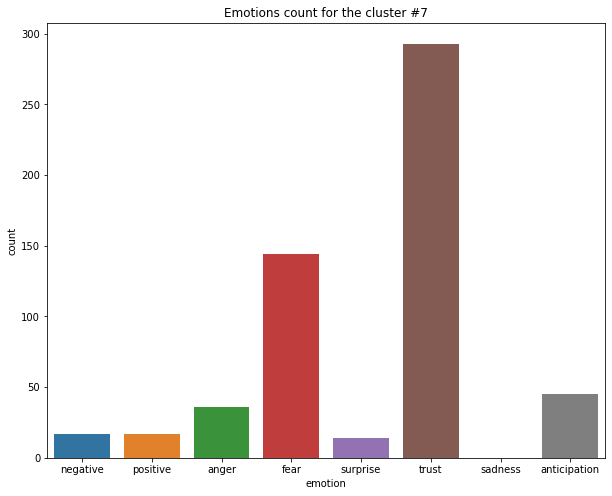

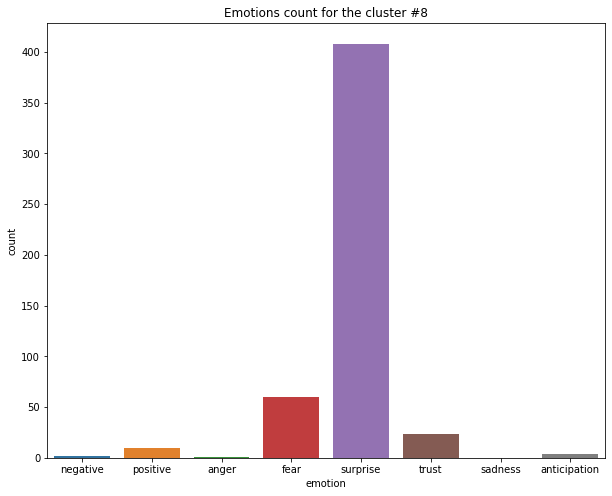

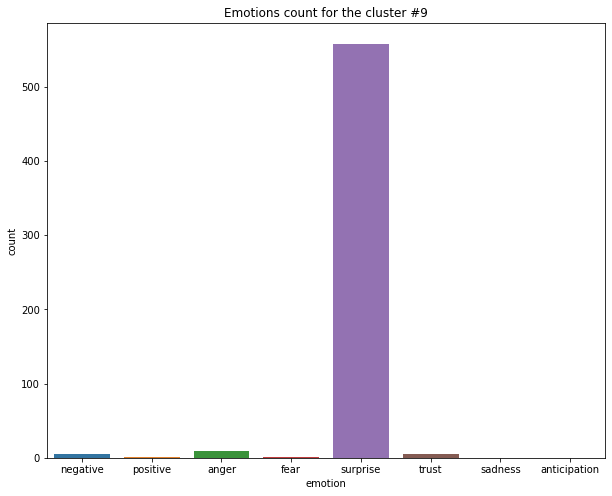

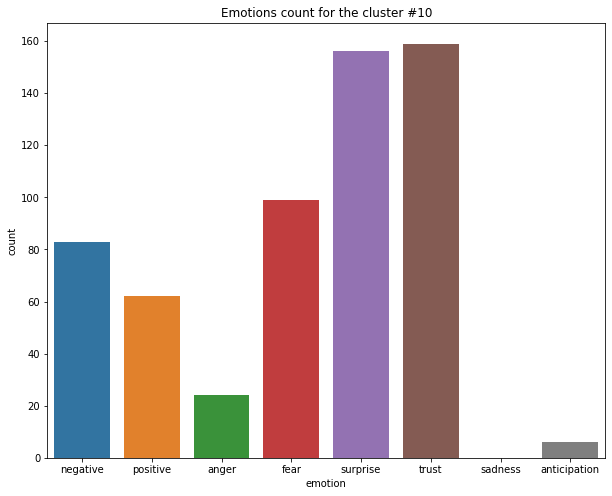

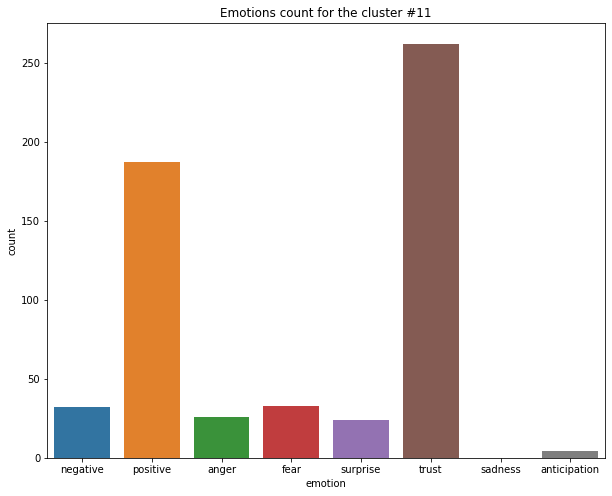

In [37]:
for c in range(trump_num_clusters):
    df = tweets_trump[tweets_trump['cluster'] == c]
    fig, ax = plt.subplots(figsize = (10,8))
    ax = sns.countplot(x='emotion', data=df, order=['negative', 'positive', 'anger', 'fear', 'surprise', 'trust', 'sadness', 'anticipation'])
    ax.set_title(f"Emotions count for the cluster #{c}")
    plt.show()
    fig.savefig(f'Plots/trump_emotions_cluster{c}.png')

## Biden sentiment analysis per cluster

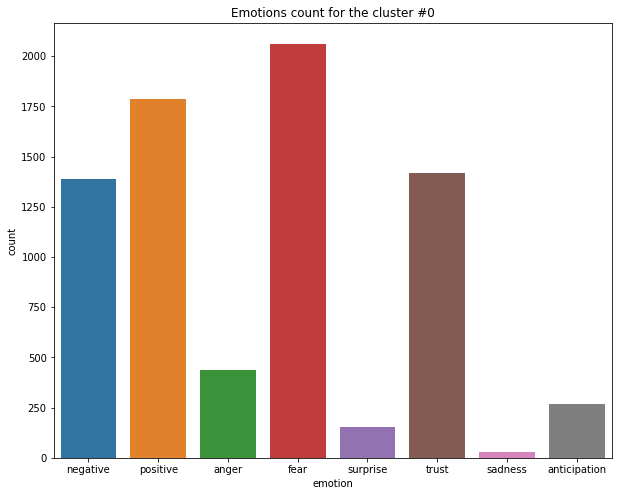

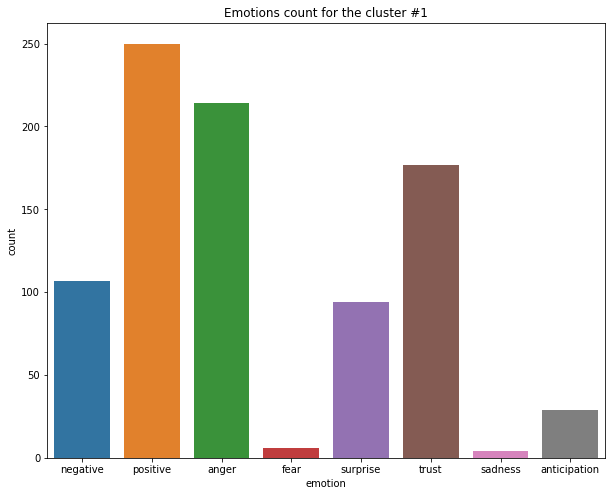

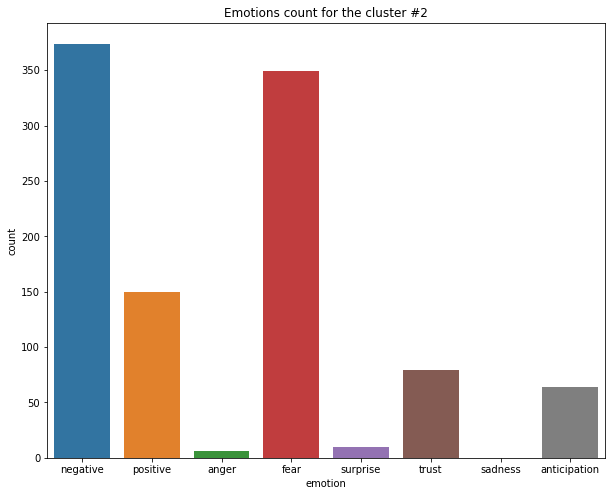

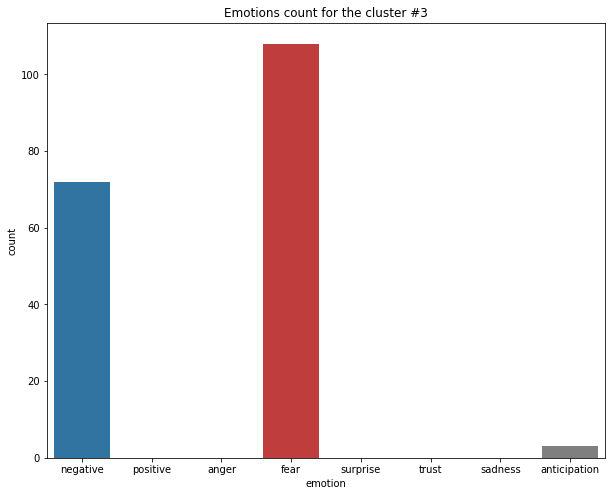

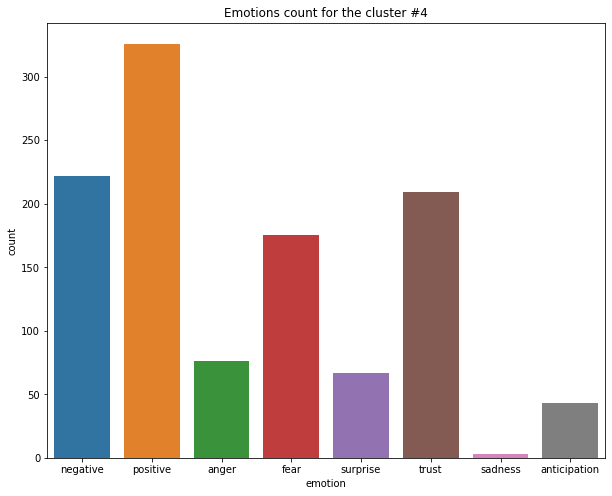

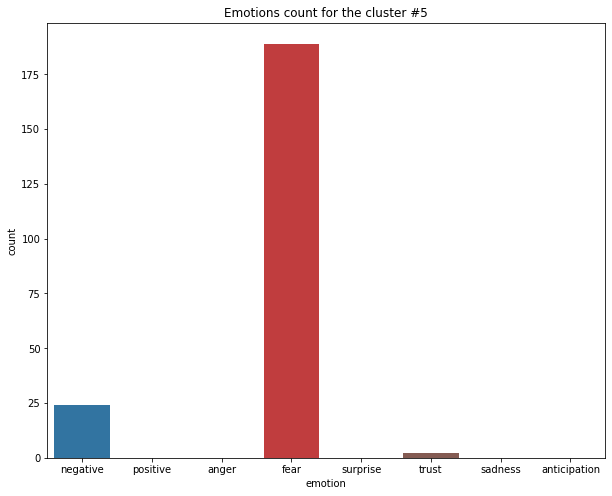

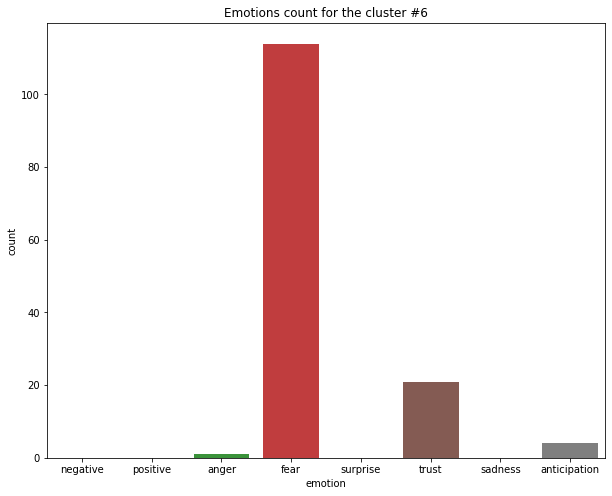

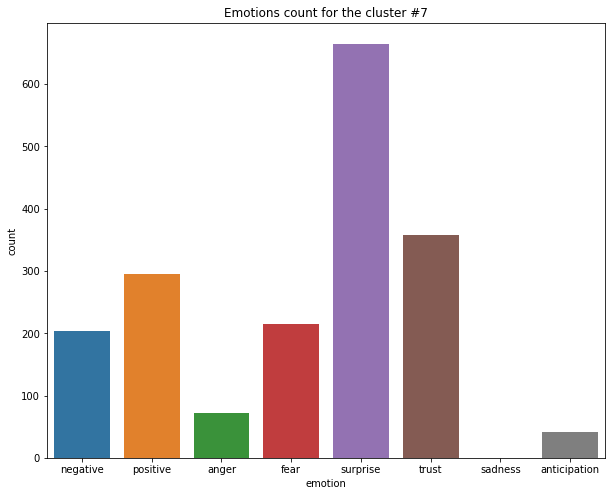

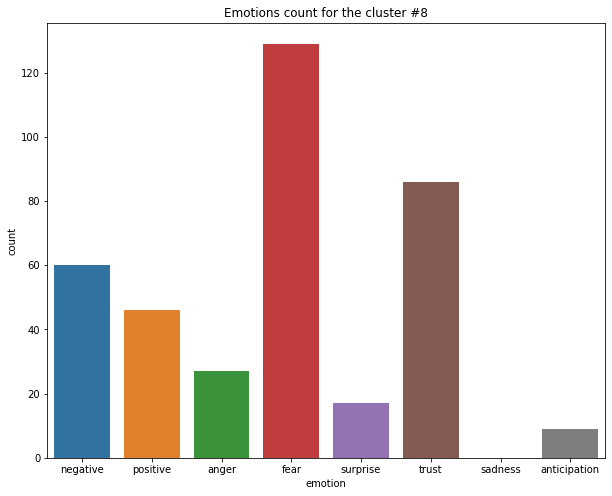

In [40]:
for c in range(biden_num_clusters):
    df = tweets_biden[tweets_biden['cluster'] == c]
    fig, ax = plt.subplots(figsize = (10,8))
    ax = sns.countplot(x='emotion', data=df, order=['negative', 'positive', 'anger', 'fear', 'surprise', 'trust', 'sadness', 'anticipation'])
    ax.set_title(f"Emotions count for the cluster #{c}")
    plt.show()
    fig.savefig(f'Plots/biden_emotions_cluster{c}.png')

## LDA

In [49]:
lda = LatentDirichletAllocation(n_components=num_clusters, random_state=42)

In [50]:
topics = lda.fit_transform(X)

In [51]:
for index,topic in enumerate(lda.components_):
    print(f"The top 10 words for topic #{index}")
    print([tfidf_vector.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

The top 10 words for topic #0
['trump please', 'anti trump', 'please vote', 'people', 'anti', 'lie', 'please', 'say', 'vote', 'trump']


The top 10 words for topic #1
['lose', 'look', 'go', 'get', 'know', 'like', 'say', 'biden', 'trump', 'amp']


The top 10 words for topic #2
['por', 'president', 'trump', 'go', 'watch', 'que', 'el', 'en', 'la', 'de']


The top 10 words for topic #3
['good', 'question', 'right', 'like', 'think', 'go', 'need', 'amp', 'get', 'vote']


The top 10 words for topic #4
['amp', 'video', 'harris', 'joe biden', 'trump', 'love', 'na', 'vote', 'biden', 'joe']


The top 10 words for topic #5
['today', 'debate', 'thank', 'win', 'election', 'rally', 'trump', 'state', 'poll', 'vote']




In [52]:
tweets_df['topic'] = topics.argmax(axis=1)

Text(0.5, 0.98, 'Size of each topic')

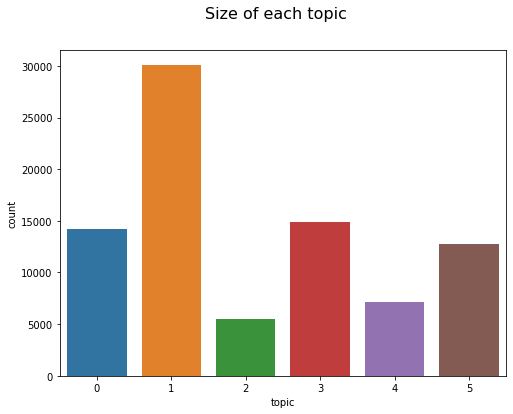

In [55]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='topic', data=tweets_df)
fig.suptitle('Size of each topic', fontsize=16)

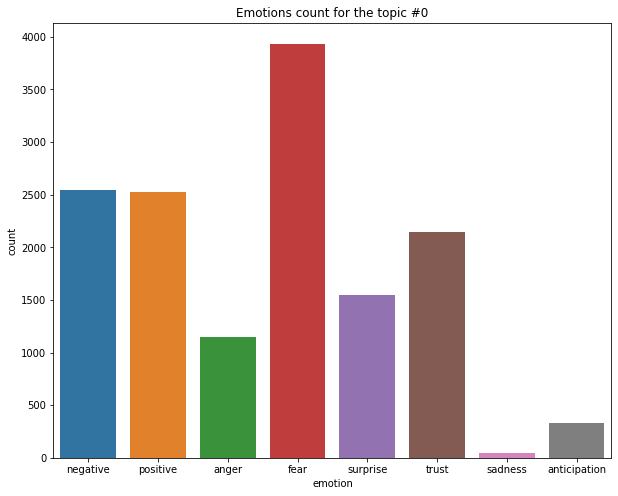

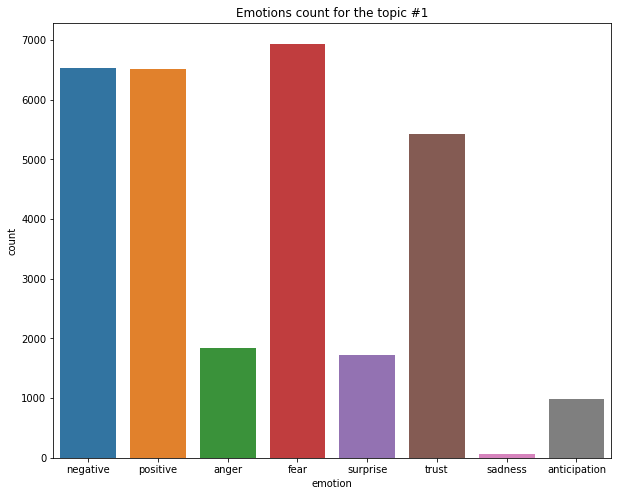

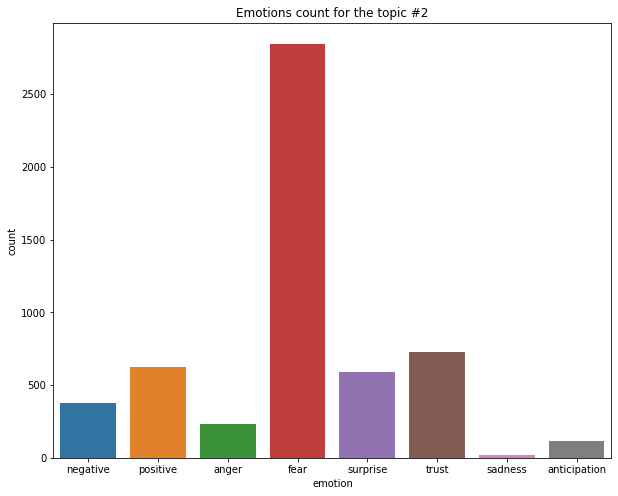

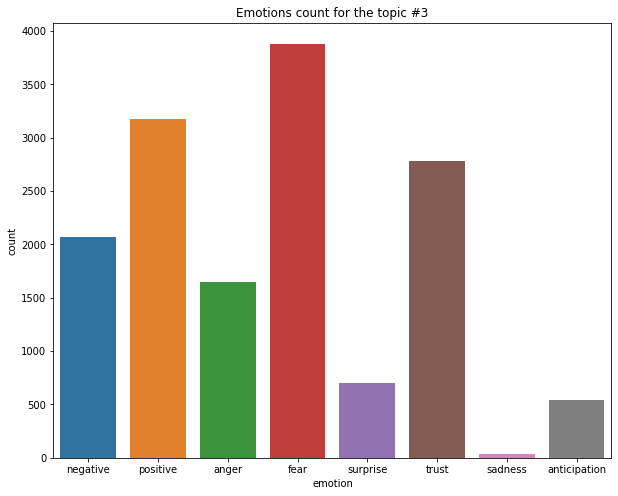

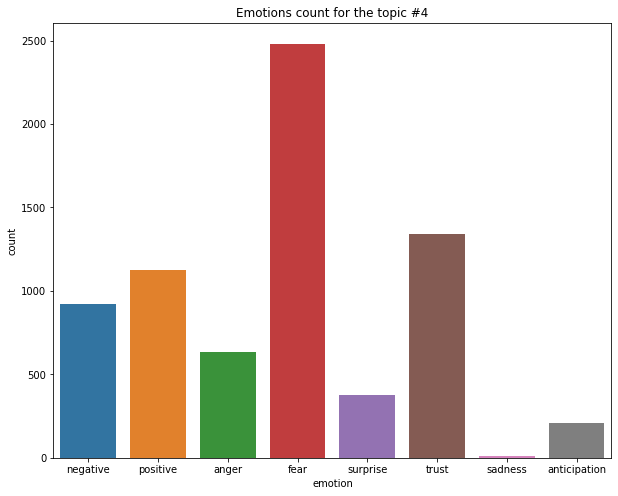

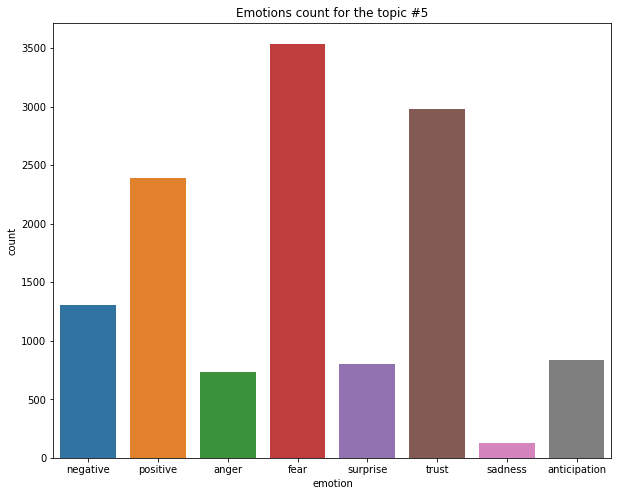

In [56]:
for c in range(num_clusters):
    df = tweets_df[tweets_df['topic'] == c]
    fig, ax = plt.subplots(figsize = (10,8))
    ax = sns.countplot(x='emotion', data=df, order=['negative', 'positive', 'anger', 'fear', 'surprise', 'trust', 'sadness', 'anticipation'])
    ax.set_title(f"Emotions count for the topic #{c}")
    plt.show()